In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import label_binarize

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay,precision_score,recall_score

In [2]:
x_train_all=pd.read_csv("CompleteDataSet/x_train_all.csv")
y_train_all=pd.read_csv("CompleteDataSet/y_train_all.csv")
x_test_all=pd.read_csv("CompleteDataSet/x_test_all.csv")
y_test_all=pd.read_csv("CompleteDataSet/y_test_all.csv")

### Metrics

In [3]:
def metric(Y_test,predicted):   
    # accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")

    # Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    # roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    fpr = (fp/(tn + fp), tp + fn)
    tnr = (tn/(tn + fp), tp + fn)

    # fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())


    # auc_val = auc(fpr, tpr)
    # plt.figure()
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve')
    # plt.legend(loc="lower right")
    # plt.show()

    # out=ConfusionMatrixDisplay(conf_matrix,display_labels=gnb.classes_)
    # out.plot()
    # plt.show()
    # print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("Specificity:", tnr)
    print("False Positive Rate:", fpr)
    # print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)


### Cross Validation

In [4]:
from sklearn.model_selection import KFold 


In [13]:
def kfold_10(input,output):
    kf = KFold(n_splits=10) 
    dt_classifier = DecisionTreeClassifier()
    accuracy_scores = []
    auc_scores = []
    prec_scores = []
    tps=[]
    fps=[]
    fns=[]
    tns=[]
    f1_scores = []
    recall_scores=[]
    for train_index, test_index in kf.split(input):
        print("Train:", len( train_index), "Validation:",len(test_index))
        X_train, X_test = input.iloc[train_index], input.iloc[test_index] 
        y_train, y_test = output.iloc[train_index], output.iloc[test_index]
        dt_classifier.fit(X_train, y_train)
        pred=dt_classifier.predict(X_test)
        predicted_probs=dt_classifier.predict_proba(X_test)
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average="weighted",zero_division=1)
        f1 = f1_score( y_test,pred, average="weighted")
        recall = recall_score( y_test, pred, average="weighted")
        # Y_test_bin = label_binarize( y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
        # roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")
        # fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())
        # auc_val=auc(fpr, tpr)
        conf_matrices = multilabel_confusion_matrix(y_test, pred)
        conf_matrix = confusion_matrix(y_test, pred)
        print("Confusion Matrix:\n", conf_matrix)
        tp = conf_matrices[:,1,1]
        fp = conf_matrices[:,0,1]
        tn = conf_matrices[:,0,0]
        fn = conf_matrices[:,1,0]
        # auc_scores.append(auc_val)
        f1_scores.append(f1)
        recall_scores.append(recall)
        prec_scores.append(precision)
        accuracy_scores.append(accuracy)
        tps.append(tp)
        fps.append(fp)
        fns.append(tn)
        tns.append(fn)
   

    avg_f1=sum(f1_scores)/10
    avg_f1=sum(f1_scores)/10
    avg_recall=sum(recall_scores)/10
    avg_prec=sum(prec_scores)/10
    average_accuracy = sum(accuracy_scores) / 10
    tp_avg=sum(tps)/10
    fp_avg=sum(fps)/10
    tn_avg=sum(tns)/10
    fn_avg=sum(fns)/10    # fpr = (fp/(tn + fp), tp + fn)
    # tnr = (tn/(tn + fp), tp + fn)
    # avg_auc=sum(auc_scores)/10
    plt.figure()
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % avg_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print("tp_avg",tp_avg)
    print("fp_avg",fp_avg)
    print("tn_avg",tn_avg)
    print("fn_avg",fn_avg)
    print(f"Average Accuracy: {average_accuracy}")
    print(f"Average Precision: {avg_prec}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1: {avg_f1}")





In [6]:
x_train_all.shape

(9690, 2304)

In [7]:
y_train_all.shape

(9690, 1)

Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0  74  57  12  49   2   1   5   9   1]
 [  0 433 130  44 128   2   1   5   6  10]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [ 24 588 181  57  92   2  14   3   6   2]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  7 385  34  19  26   5   0   6   8   2]
 [  1 101 271  42  37   2  10   5   5   3]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  4 157 544 127  86   3   5  25  12   6]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  7 124 504  55  80   9   6   1   7  11]
 [  1  25  15 110   4   1   2   1   1   5]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  2  74 157 578  53  16  33   6  24  26]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  3  28  32 187  13   0   3   1   5   4]
 [ 48 173  90  18 342   5   0   7   7   3]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  8 124  92 117 565   1  17  11  33   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  9  25  39   9 233   0   0   1   1   1]
 [  3  18  14  22  39   0   0  58  37  19]
 [  4  24  65  57  20   0   0  35  96  59]
 [  3  18  14   8   8   0   0  20   8   2]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Train: 8721 Validation: 969


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0  13  10  28   9  30  23  46   0   0]
 [ 21  82  70 100  42  83 129  13   0   0]
 [  0  27  50  50  14  36  78  15   0   0]]


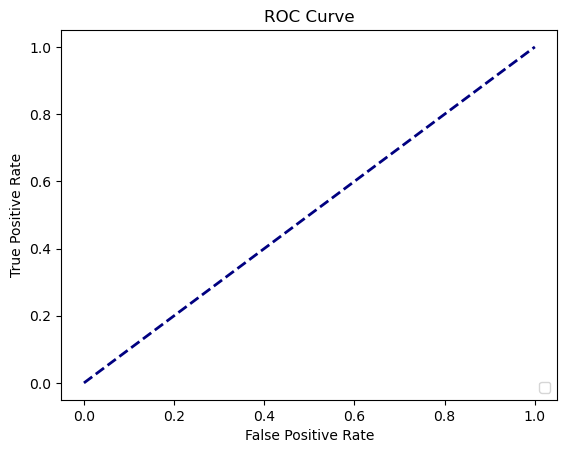

tp_avg [  0.  140.6 131.9  87.5 114.    0.    0.    6.6   0.    0. ]
fp_avg [ 14.5 108.7 105.   76.5  70.   19.7  32.2  19.8  26.5  15.5]
tn_avg [21.  81.4 93.1 53.5 84.  21.  36.  17.4 54.  27. ]
fn_avg [933.5 638.3 639.  751.5 701.  928.3 900.8 925.2 888.5 926.5]
Average Accuracy: 0.49597523219814244
Average Precision: 0.9389038193645997
Average Recall: 0.49597523219814244
Average F1: 0.5998347022022026


In [14]:
kfold_10(x_train_all,y_train_all)

In [19]:
def train_test_split(X_train,X_test,y_test,y_train):
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train,y_train)
    predicted=dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    metric(y_test,predicted)
    predicted_probs = dt_classifier.predict_proba(X_test)

    accuracy = accuracy_score(y_test,predicted )
    f1 = f1_score(predicted, y_test, average="weighted")
    conf_matrix = confusion_matrix(y_test, predicted)
    precision = precision_score(y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(y_test, predicted, average="weighted")

    Y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    conf_matrices = multilabel_confusion_matrix(y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = (fp/(tn + fp), tp + fn)    
    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())


    auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    out=ConfusionMatrixDisplay(conf_matrix,display_labels=dt_classifier.classes_)
    out.plot()
    plt.show()
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("False Positive Rate:", fpr)
    print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.6965232765896796
Precision: 0.6880163520136963
Recall/Sensitivity/True Positive Rate: 0.6922330097087379
Specificity: (array([0.98415842, 0.90337553, 0.92179487, 0.94621212, 0.92427984,
       0.98679868, 0.98633333, 0.99273927, 0.98741497, 0.99166667]), array([ 60, 720, 750, 450, 660,  60,  90,  60, 150,  90], dtype=int64))
Confusion Matrix:
 [[ 21  13   2   2  21   0   1   3   5   1]
 [ 10 564  67  20  62   5  12  24   9  20]
 [  3  66 576  59  38   1   4   2   7   3]
 [  8   7  39 324  47   7   9   7  17   1]
 [ 18  53  53  18 468  17   4   0  20   1]
 [  0   0   4   0   3  29   9   9   7   8]
 [  0   1   1   9  11   1  35   2  16   0]
 [  0   8   2   2   3   0   0  10   1   6]
 [  0   3   5   6   5   0  12   2  66   4]
 [  0   5   1  10   2   0   4   1   2  46]]


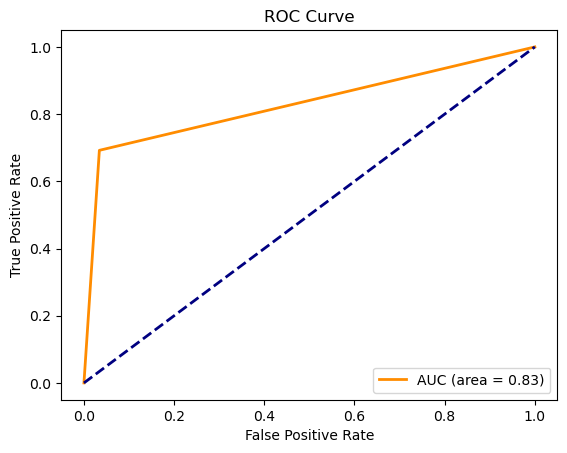

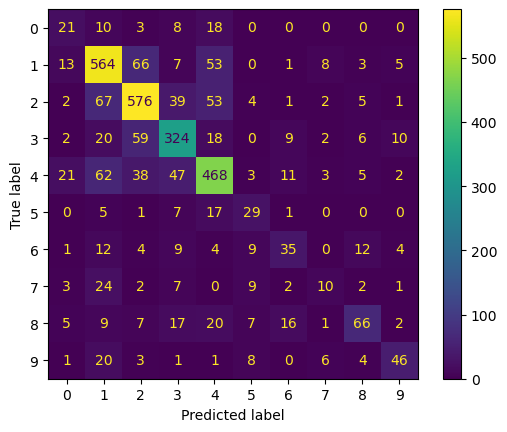

Accuracy: 0.6922330097087379
F1 Score: 0.6965232765896796
Precision: 0.6880163520136963
Recall/Sensitivity/True Positive Rate: 0.6922330097087379
False Positive Rate: [0.         0.03419633 1.        ]
Area under ROC curve: 0.8123868457237291
Confusion Matrix:
 [[ 21  10   3   8  18   0   0   0   0   0]
 [ 13 564  66   7  53   0   1   8   3   5]
 [  2  67 576  39  53   4   1   2   5   1]
 [  2  20  59 324  18   0   9   2   6  10]
 [ 21  62  38  47 468   3  11   3   5   2]
 [  0   5   1   7  17  29   1   0   0   0]
 [  1  12   4   9   4   9  35   0  12   4]
 [  3  24   2   7   0   9   2  10   2   1]
 [  5   9   7  17  20   7  16   1  66   2]
 [  1  20   3   1   1   8   0   6   4  46]]


In [20]:
train_test_split(x_train_all,x_test_all,y_test_all,y_train_all)